# Introdução ao aprendizado de máquina (*Machine Learning*) em Python 🐍

O conteúdo deste tutorial é baseado neste **vídeo:** https://www.youtube.com/watch?v=_Z9TRANg4c0&list=PLOU2XLYxmsII9mzQ-Xxug4l2o04JBrkLV&index=1


## Bibliotecas

Existem diversas bibliotecas para a implementação de modelos de *aprendizado de máquina* em Python, dentre estas as bibliotecas `tensorflow` e `numpy`. Tais bibliotecas seráo utilizadas neste tutorial.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Perceptron: a estrutura básica de uma rede neural

Um **perceptron** é uma estrutura na forma $y = g(\omega_0 + \omega_1 x)$ que mapeia uma variável resposta $y$ à uma variável preditora $x$ (*feature*) através de uma função de ativação $g(\cdot)$. O perceptron é o similar ao neurônio em uma rede neural.

Uma rede neural, no entanto, pode ser definida como uma *rede* de *perceptrons*:

* Se $\boldsymbol{x}$ é um vetor $\boldsymbol{x} = \{ x_1, x_2, \ldots, x_m \}$ e $g_e(\cdot)$ é uma função $\mathbb{R}^m \to \mathbb{R}^n$ então os *perceptrons* $y_j = g_e \left(\omega_{j 0} + \sum_i \omega_{j i} x_i \right)$, $j = 1, 2, \ldots, n$, mapeiam $\{ x_1, x_2, \ldots, x_m \} \to \{ y_1, y_2, \ldots, y_n \}$.

* Se $\boldsymbol{y}$ é um vetor $\boldsymbol{y} = \{ y_1, y_2, \ldots, y_n \}$ e $h(\cdot)$ é uma função $\mathbb{R}^n \to \mathbb{R}^p$ então os *perceptrons* $v_k = h \left(\tau_{k 0} + \sum_j \tau_{k j} y_j \right)$, $k = 1, 2, \ldots, p$, mapeiam $\{ y_1, y_2, \ldots, y_n \} \to \{ v_1, v_2, \ldots, v_p \}$.

* Se $\boldsymbol{v}$ é um vetor $\boldsymbol{v} = \{ v_1, v_2, \ldots, v_p \}$ e $g_s(\cdot)$ é uma função $\mathbb{R}^p \to \mathbb{R}^q$ então os *perceptrons* $z_l = g_s \left(\phi_{l 0} + \sum_k \omega_{l k} v_k \right)$, $l = 1, 2, \ldots, q$, mapeiam $\{ v_1, v_2, \ldots, v_p \} \to \{ z_1, z_2, \ldots, z_q \}$.

* A *rede neural* pode ter quantas camadas quanto forem necessárias.

* Uma camada que liga todas as entradas com todas as saídas é chamada de uma *camada densa*.

* As camadas intermediárias (como a que mapeia $\mathbb{y} \to \mathbb{v}$ são chamadas *camadas ocultas* ou *hidden layers*.

## Definição do modelo de regressão linear simples

O modelo de regressão linear simples, definido por $y = \beta_0 + \beta_1 x$, pode ser definido como uma rede neural com uma única camada (único **perceptron**).

O comando abaixo define uma rede neural **densa** de 1 perceptron (`units= 1`) cuja entrada é uma lista de 1 posição (`input_shape= [1]`).

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Fornecidos os vetores `y` e `x` o modelo ao ser treinado estimará os pesos $\omega_0$ e $\omega_1$ usando um **otimizador** e uma **função de perda**.

Neste exemplo, serão utilizados o *otimizador* **Stochastic Gradient Descend** e a função de perda será aquela que minimiza a **média dos erros quadráticos**.

O otimizador **Stochastic Gradient Descend** é semelhante ao algoritmo de Newton-Raphson; será utilizado para minimizar a função de perda.

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### Fornecendo os dados

Para o modelo de exemplo, considere os vetores abaixo que mostram a conversão de temperaturas entre graus Celcius (vetor `xs`) para graus Fahrenheit (vetor `ys`). Os dados são compostos de 6 valores inteiros descritos nos 2 vetores abaixo:

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

### Treinando a Rede Neural

O treinamento da rede neural consiste simplesmente no "ajuste" do modelo. Ao chamar o método `model.fit()` os pesos $\omega_0$ e $\omega_1$ serão ajustados através do otimizador de modo que a função de perda seja minimizada. É um processo iterativo, no qual a cada passo o modelo é "refinado". A quantidade de passos no ajuste é dado por `epochs`.

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 17.8411
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 14.0594
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 11.0837
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 8.7420
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 6.8993
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 5.4491
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 4.3077
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 3.4093
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 2.7020
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 2.1452
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 1.7067
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 1.3613
Epoch 13/500
1/1 [==============================]

Após ajustar o modelo, este pode ser utilizado para se fazer previsões. O modelo em questão é dado por $y = 1 + 3 x$. O valor predito para $x = 10$ deve ser $y = 31$.

In [6]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 127ms/step
[[31.005665]]


## Aplicação: Visão computacional

A referência para este tutorial está no **vídeo:** https://www.youtube.com/watch?v=j-35y1M9rRU&list=PLOU2XLYxmsII9mzQ-Xxug4l2o04JBrkLV&index=2

Os problemas chamados de **visão computacional** consistem na capacidade do computador avaliar imagens para identificar padrões, identificar objetos, etc.

Este exemplo usa uma base de dados implementada na biblioteca `tensorflow` que consiste em 70 mil imagens de vestuário classificadas em 10 classes. O objetivo é usar parte destas imagens para treinar o algoritmo a identificar os objetos e, posteriormente, utilizar o algoritmo para classificar os objetos não utilizados no treinamento.

### Descrição do exemplo

O primeiro passo consiste em carregar a biblioteca TensorFlow.

In [7]:
import tensorflow as tf
print(tf.__version__)

2.15.0


A rede neural será treinada para reconhecer itens de vestuário de um conjunto de dados chamado *Fashion MNIST*. Mais detalhes sobre este conjunto de dados podem ser obtidos [aqui](https://github.com/zalandoresearch/fashion-mnist).

Ele contém 70.000 itens de vestimenta em 10 categorias diferentes. Cada item é uma imagem 28x28 monocromática. Um exemplo dos itens pode ser visto aqui:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

O conjunto de dados `Fashion MNIST` está disponível em `tf.keras.datasets`.

In [8]:
mnist = tf.keras.datasets.fashion_mnist

Ao invocar `load_data()` neste objeto serão obtidos 2 conjuntos com 2 listas: 2 listas de treinamento e 2 listas de teste.

In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### Qual a aparência destes dados?

Cada um dos itens é uma matriz 28 x 28 com os valores de cada pixel que compõe a respectiva imagem.

In [10]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Esta matriz pode ser visualizada como imagem:

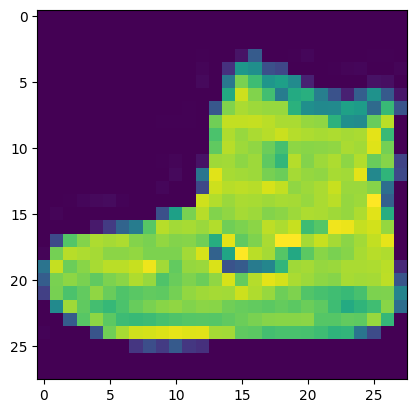

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0]);

Cada imagem possui um *label* composto por um número de `0` a `9` que identifica o tipo de vestimenta. Este problema é, portanto, um modelo de **aprendizado de máquina supervisionado** pois cada imagem já está previamente classificada.

In [12]:
print(training_labels[0])

9


Observe que cada imagem é uma matriz de valores inteiros de `0` a `255` indicando uma escala monocromática para cada pixel. Para simplificar o modelo este valor será convertido para um número de ponto flutuante entre `0` e `1`. Este processo se chama '**normalização**':

In [13]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

O modelo é composto por uma rede neural com 3 "camadas" definidas em `tf.keras.models.Sequential()`.

* A primeira camada **converte as matrizes 28 x 28** em um vetor com $28 \times 28 = 784$ posições. Isto é feito com o método `tf.keras.layers.Flatten()`.
* A segunda camada recebe o vetor proveniente da camada anterior e aplica a transformação $\boldsymbol{z} = g_1(\omega_{0} + \omega_{1} \cdot x_{1} + \omega_{2} \cdot x_{2} + \cdots + \omega_{784} \cdot x_{784})$ resultando em um vetor de 128 respostas. A função $g_1(\cdot)$ é chamada de **relU** e é definida como $g_1(z) = \max (0; z)$.
* A terceira camada recebe o vetor proveniente da chamada anterior e aplica a transformação $\boldsymbol{y} = g_2(\tau_0 + \tau_1 \cdot z_1 + \tau_2 \cdot z_2 + \cdots + \tau_{128} \cdot z_{128})$ resultando em um vetor de 10 posições. A função $g_2(\cdot)$ é chamda de **soft-max** e retorna um vetor com 10 posições em que aquela na qual $\boldsymbol{y}$ é máximo assume o valor `1` e as demais o valor `0`.

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

O modelo será ajustado usando o otimizador *Adam* e a função de perda `sparse_categorical_crossentropy`.

O otimizador *Adam* é um método do tipo *stochastic gradient descent* basedo na estimação adaptativa dos momentos de primeira (média) e segunda ordem (variância).

A função de perda *sparse categorical cross-entropy* minimiza a entropia com base na probabilidade de cada categoria e a classificação correta para cada item.

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4982 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3125 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.8917


A acurácia aumenta conforme os passos do modelo são ajustados. O valor final é algo em torno de 90% com apenas 5 passos.

É possível verificar a acurácia do modelo para os dados não utilizados no treinamento do modelo.

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3428 - accuracy: 0.8785


[0.3427875339984894, 0.8784999847412109]

## Explorando o modelo

O comando abaixo calcula as probabilidades de classificação entre as 10 categorias para cada imagem de teste.

In [17]:
classifications = model.predict(test_images)

print(classifications[0])
print(np.sum(classifications[0]))

313/313 [==============================] - 1s 2ms/step
[1.5705777e-05 7.3770633e-07 4.3063465e-06 2.1916544e-06 7.6206311e-06
 2.0872248e-02 3.0977411e-05 6.6584468e-02 1.2393612e-04 9.1235781e-01]
1.0


O algoritmo não classificou corretamente este objeto. Como se pode ver o objeto é um calçado.

In [18]:
print(test_labels[0])

9


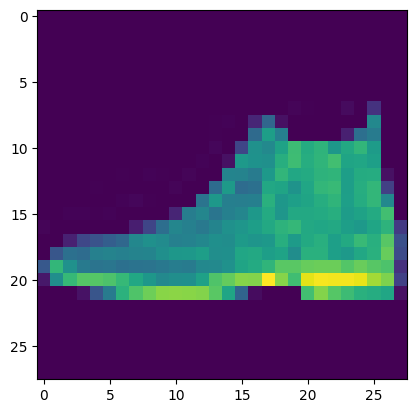

In [19]:
plt.imshow(test_images[0])

O código abaixo explora o resultado obtido ao aumentar o número de perceptrons na camada intermediária de 128 para 1024.



In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4735
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[2.6455481e-08 1.9040698e-09 9.2487431e-09 3.0685718e-09 4.9322789e-08
 1.1685892e-01 6.6896348e-08 3.1756442e-02 3.0831934e-08 8.5138452e-01]
9


Tanto a entrada quanto a saída do modelo precisa ter as dimensões corretas dos objetos de entrada e os *labels*. Os dois exemplos abaixo demonstram isto.

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Esta versão tem a camada 'flatten' removida. Substitua o código acima para ver um erro.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5175
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3899
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3534
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3287
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[4.6406878e-04 1.3139577e-06 3.6193278e-06 1.9846923e-06 9.0929650e-05
 1.2512090e-02 3.3699813e-05 2.2810450e-01 3.0736399e-03 7.5571418e-01]
9


Mais um exemplo:

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Substitua a definição do modelo acima por este para uma rede com uma camada de saída com 5 níveis
# e terá como resultado um erro!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5203
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3905
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3540
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3279
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.4752352e-07 9.5699079e-07 1.2750238e-06 1.9967745e-06 1.3763816e-06
 1.0254699e-02 9.3240129e-07 5.6409750e-02 3.8021171e-04 9.3294847e-01]
9


É possível aumentar a quantidade de *layers*. Neste exemplo não faz muita diferença uma vez que os dados são simples. Em imagens mais complexas se faz necessário aumentar a quantidade de camadas.

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4678
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3564
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.7091254e-07 6.4799181e-08 3.7887770e-07 2.6144096e-09 6.0978039e-07
 5.1234622e-02 7.6891905e-07 5.0812140e-03 2.8348541e-08 9.4368219e-01]
9


Aumentar a quantidade de passos na estimação pode melhorar o ajuste, porém aumentar demasiadamente este valor causa um *overfitting* (o modelo fica viciado aos dados).

In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4993
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3774
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3419
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3153
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2975
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2831
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2593
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402
Epoch 11/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2327
Epoch 12/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0

### Qual o efeito da normalização?

Os modelos de redes neurais podem ganhar acurácia se os valores de entrada forem normalizados para um intervalo com menor escala (em geral o intervalo `0` a `1`). O código abaixo demonstra isso.

In [25]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# Experimente remover a normalização, comentando as 2 linhas seguintes.
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4736
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3617
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3231
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2978
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.0020098e-07 2.7457803e-08 1.1030566e-09 3.8326666e-09 2.3404695e-08
 4.1668927e-03 7.8664764e-09 1.0030013e-02 8.3879910e-11 9.8580277e-01]
9


A rede pode ser treinada até atingir um determinado nível de acurácia. Isto é feito com a definição de uma class **call-back** como demonstrado abaixo. Este recurso pode inibir o *overfitting* do modelo, uma vez que o ajuste é interrompido antes do modelo *viciar* com os dados de treinamento.

In [26]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.15.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4759 - accuracy: 0.8305
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3587 - accuracy: 0.8690
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3233 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2962 - accuracy: 0.8900
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2803 - accuracy: 0.8972


## Convolução

Este tutorial é baseado no **vídeo:** https://www.youtube.com/watch?v=PCgLmzkRM38&list=PLOU2XLYxmsII9mzQ-Xxug4l2o04JBrkLV&index=3

As *convoluções* junto com o *Pooling* são usados para comprimir e simplificar as imagens enfatizando suas características.

### Limitações do modelo DNN (*deep neural network*) anterior

No modelo anterior as imagens do conjunto de dados do MNIST eram imagens 28 x 28, monocromáticas e com os objetos centralizados. Exemplos destas imagens eram
![Imagem de um sweater e uma bota](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

O DNN anterior aprendeu a distinguir em alguns pixeis um sweater de uma bota, mas como o modelo classificaria esta imagem?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

Para avaliar imagens mais complexas torna-se necessário usar *convoluções* para filtrar elementos da imagem e extrair características.



Inicialmente, carregue as bibliotecas necessárias.

In [27]:
import cv2
import numpy as np
import scipy
i = scipy.datasets.ascent()

A imagem que será utilizada para o tutorial é a seguinte:

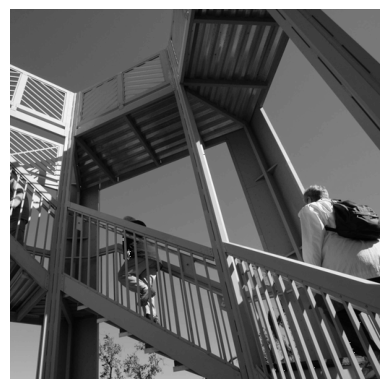

In [28]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

É a imagem de uma escadaria. Existem diversos atributos nesta imagem, sobretudo linhas horizontais e verticais. A convolução permite ressaltar estes elementos.

In [29]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

É possível definir um filtro como uma matrix 3 por 3.

In [30]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Agora define-se a convolução; mantendo uma margem de 1 pixel, multiplique cada vizinho do pixel pela possição correspondente no filtro. Depois multiplica-se pelo peso e mantém-se o valor entre `0` e `255`.

In [31]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

A imagem transformada é a seguinte:

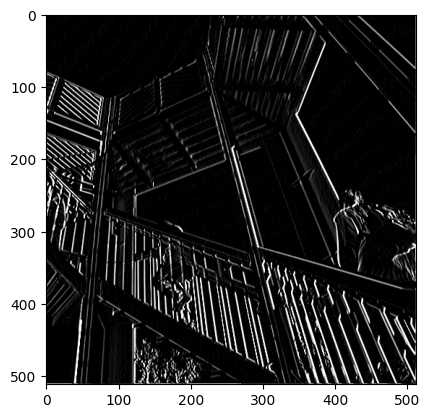

In [32]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

## Pooling

Existem diferentes formas de *pooling*; em particular será aplicada o *max-pooling*.

 A idea é iterar sobre a imagem e, para cada pixel, tomar os valores à direita, abaixo e diagonal à direita. Tomando o maior valor entre estes resultando em uma imagem 1/4 menor que a original. As características da imagem se mantém apesar da compressão.

O código mostra um *pooling* (2, 2) resultando em uma imagem 1/4 do tamanho original.

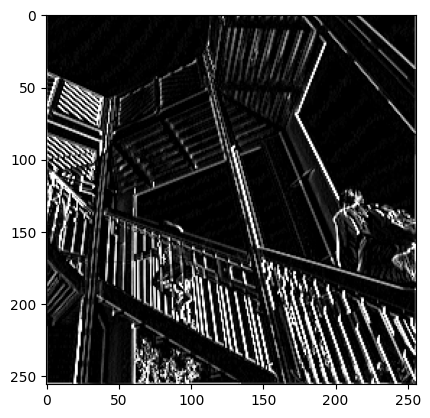

In [33]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Esta técnica é utilizada para simplificar imagens em modelos mais complexos.

## Melhorando a acurácia da visão computacional com convoluções

Nos exemplos anteriores as imagens de vestimentas foram reconhecidas usando uma *Deep Neural Network* (DNN) com três camadas -- a camada de entrada (com o formato dos dados), a camada de saída (com o formato desejado para a saída) e uma camada ocultar.

In [34]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3116 - accuracy: 0.8869
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8707


A acurácia é algo em torno de 89% no treinamento e 87% na validação. É possível melhorar usando *convoluções*. Trata-se de algo bastante similar com o processamento de imagens por filtros (como este: https://en.wikipedia.org/wiki/Kernel_(image_processing)).

O código abaixo é a mesma rede neural que antes, mas com camadas de convolução adicionadas. É mais demorado para ajustar, mas a acurávia deve ser maior:

In [35]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.15.0
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 128)      

A precisão deve estar em torno de 93% nos dados de treinamento e 91% nos dados de validação.

Observe o código novamente, e veja, passo a passo como a convolução é construída:

O **primeiro passo** é a obtenção dos dados. Há uma pequena mudança no formato dos dados de entrada. A convolução espera um único *tensor* (matriz multidimensional) contendo todos os dados, ao invés de 60 mil itens 28 x 28 x 1 em uma lista, é fornecida uma matriz que 4 dimensões 60.000 x 28 x 28 x 1 e o mesmo é feito para as imagens de teste.

```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```

O **próximo passo** é definir o modelo. Ao invés de uma camada de entrada no topo, adiciona-se uma convolução. Os parâmetros são:

1. O número de convoluções para gerar. Totalmente arbitrário, mas uma boa estratégia é usar um múltiplo de 32.
2. O tamanho da convolução, neste caso uma matriz 3 x 3.
3. A função de ativação para usar.
4. O formato dos dados de entrada.

A convolução é seguida de uma camada *MaxPooling* usada para comprimir os dados, reduzindo a imagem em 25%.

Chamando `model.summary()` é possível ver o tamanho do modelo e observar que as camadas *MaxPooling* reduzem a dimensão para 1/4.

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```

Uma segunda convolução

```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
```

Seguido de uma camada *Flatten* para transformar a imagem em um vetor.

```
  tf.keras.layers.Flatten(),
```



## Visualizando as convoluções e o pooling

Este código mostra as convoluções em gráficos. A variável (test_labels[;100]) contém os labels das 100 imagens iniciais do conjunto de teste.



In [36]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 15ms/step


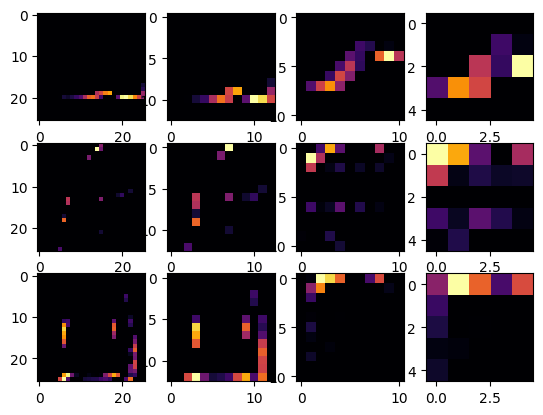

In [37]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [38]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.15.0
11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1510 - accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 10/1

# Convoluções com imagens complexas

**Referência:** https://www.youtube.com/watch?v=0kYIZE8Gl90&list=PLOU2XLYxmsII9mzQ-Xxug4l2o04JBrkLV&index=5&t=838s

Exemplo de classificação entre humanos e cavalos. Obtendo os dados:

In [39]:
import tensorflow as tf
import tensorflow_datasets as tfds

train_image, train_label = tfds.as_numpy(tfds.load(
    'horses_or_humans',
    split= 'train',
    batch_size= -1,
    as_supervised= True
))

print(type(train_image), train_image.shape)
print(train_label)

test_image, test_label = tfds.as_numpy(tfds.load(
    'horses_or_humans',
    split= 'test',
    batch_size= -1,
    as_supervised= True
))

print(type(test_image), test_image.shape)
print(test_label)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteHXIO4L/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteHXIO4L/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.
<class 'numpy.ndarray'> (1027, 300, 300, 3)
[0 0 0 ... 0 1 0]
<class 'numpy.ndarray'> (256, 300, 300, 3)
[0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1]


Construindo o modelo:

In [40]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8



#for i, img_path in enumerate(next_horse_pix+next_human_pix):
#  # Set up subplot; subplot indices start at 1
#  sp = plt.subplot(nrows, ncols, i + 1)
#  sp.axis('Off') # Don't show axes (or gridlines)
#
#  img = mpimg.imread(img_path)
#  plt.imshow(img)
#
#plt.show()

for i in range(16):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  plt.imshow(train_image[i])



Adiciona-se camadas de *convolução* e uma camada *flatten* ao resultado final para alimentar as camadas densamente conectadas.


In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 64)      

A coluna "output shape" mostra o tamanho das características em cada camada sucessiva. As camadas de convolução reduz o tamanho dos mapas de características devido ao deslocamento e a cada camada de *pooling* diminui a dimensão.

O modelo será treinado usando a função de perda `binary_crossentropy`, pois é um problema de classificação binária e a ativação final é uma sigmóide. (Para relembrar as métricas de funções de perda, veja [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) Será utilizado o otimizador `rmsprop` com uma taxa de aprendizagem de `0.001`. Durante o treinamento será monitorada a acurácia da classificação.

**NOTA**: Neste caso, usando o [algoritmo de otimização RMSprop](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) é preferível ao [gradiente estocástico descendente](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), pois o RMSprop automatiza a taxa de aprendizagem. (Outros otimizadores, tais como o [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) e o [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), também adapta automáticamente a taxa de aprendizagem durante o treinamento.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#from tf.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate= 0.001),
              metrics=['accuracy'])

### Treinando o modelo

O modelo será treinado em 15 *epochs*. A perda (*loss*) e a acurácia (*accuracy*) são grandes indicadores do progresso do treinamento. O modelo prediz a classificação dos dados e, comparando às classes reais, calcula os resultados.

In [ ]:
history = model.fit(
      train_image, train_label,
      validation_data = (test_image, test_label),
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

## Executando o modelo

Após ajustar os modelos é possível observar que a rede categoriza as imagens com diversos erros apesar da acurácia no treinamento ser superior a 99%.

Isto ocorre por algo chamado **overfitting**, que significa que a rede neural é treinada com um conjunto de dados muito limitados -- existem apenas 500 imagens de cada classe. Assim o modelo se torna excelente para reconhecer as imagens do conjunto de treinamento mas falha ao avaliar imagens fora do conjunto.

Quanto mais dados são usados no treinamento, melhor o modelo se torna. No entanto, existem dive
rsas técnicas que podem ser usadas para melhorar o treinamento do modelo, apesar dos dados limitados, incluindo algo chamado de *Image Augmentation*.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

classes = model.predict(test_image, batch_size= 10)

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 16
ncols = 16

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 8

for i in range(test_image.shape[0]):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  sp.title.set_text("Humano" if classes[i] > 0.5 else "Cavalo")
  plt.imshow(test_image[i])

plt.show()

## Visualizando representações intermediarias

False
1/1 [==============================] - 0s 335ms/step


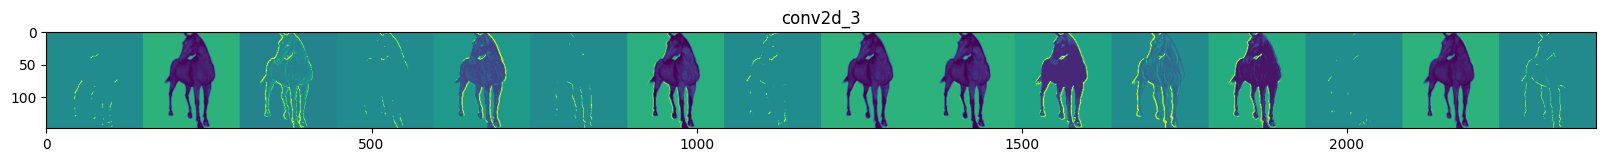

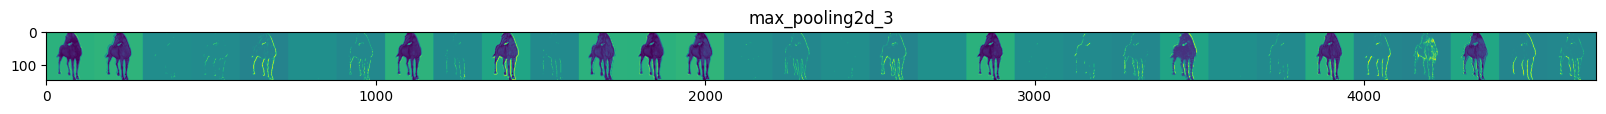

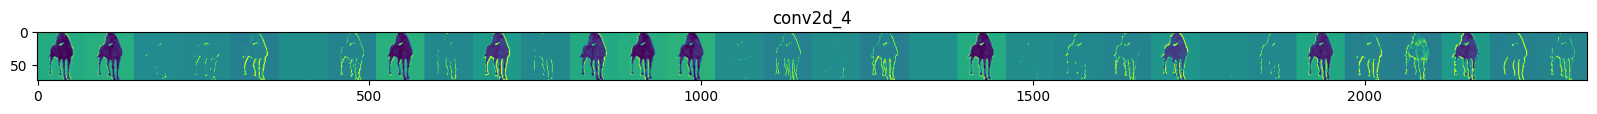

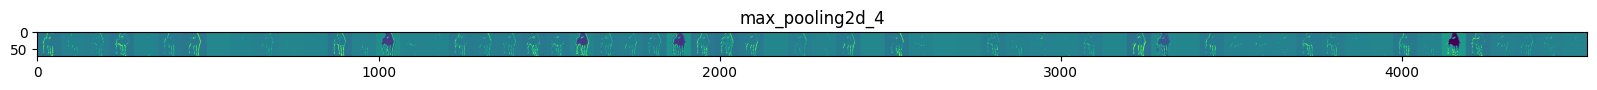

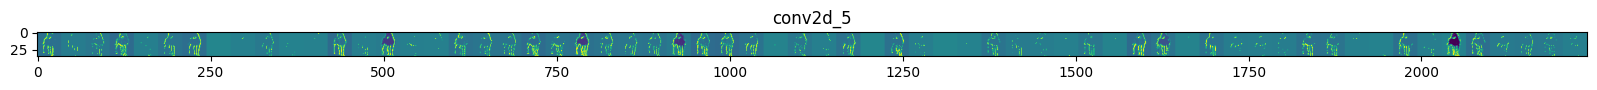

In [ ]:
import numpy as np
import random

images = np.concatenate((train_image, test_image), axis = 0)

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
#horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
#human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
#img_path = random.choice(horse_img_files + human_img_files)

img = random.choice(range(images.shape[0]))

#img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = images[img]  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

print(np.any(x > 255))

# Rescale by 1/255
x = x / 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if np.any(x > 0):
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Como se pode ver as imagens se tornam cada vez mais abstratas e compactas. As representações sinalizam as características que a rede identifica e mostram cada vez menos características sendo "ativadas"; muitas são ajustadas em zero. Isto é chamado de "esparticidade." A esparticidade da representação é a característica chave para o *deep learning*.

Estas representações carregam cada vez menos informações sobre os pixeis originais da imagem, e cada vez mais informações refinadas sobre a classe da imagem. É possível pensar em uma `convnet` (ou uma rede neural em particular) como uma destilaria de informações.

